Omega_1 =  5.916079783099616
zeta_1 =  0.059160797830996155
omega_2 =  5.905717568594015


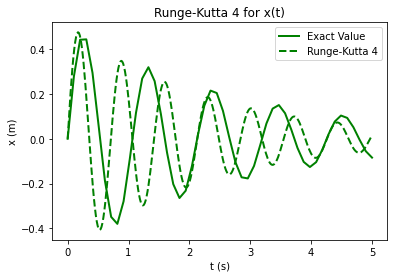

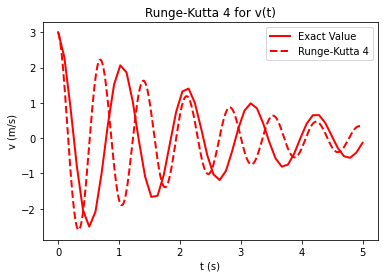

In [2]:
"""Runge Kutta 4th Project"""

""" 1. ASSUMING F(t) = 0"""

from math import *
import numpy as np
import matplotlib.pyplot as plt

#Variables
k = 35
gamma = 0.7
m = 1.0
k_1 = 1. / 4           #making up value of k_1
k_2 = 2. / 4           #making up value of k_2
k_3 = 2. / 4           #making up value of k_3
k_4 = 1. / 4           #making up value of k_4
a_2 = 1. / 2           #making up value of a_2
a_3 = 1. / 2           #making up value of a_3
a_4 = 1.               #making up value of a_4
b_21 = 1. / 2          #making up value of b_21
b_31 = 0.              #making up value of b_31
b_32 = 1. / 2          #making up value of b_32
b_41 = 0.              #making up value of b_41
b_42 = 0.              #making up value of b_42
b_43 = 1.              #making up value of b_43
f_over_m = lambda t: 0         #assuming f(x)=0
fxy_x = lambda t, x, v: v      #function of x
fxy_v = lambda t, x, v: f_over_m(t) - 2 * gamma * v - k * x  #function of v
t_i = 0.0          #t initial 
t_f = 5.0          #t final 
n = 325
dt = (t_f - t_i) / (n - 1)
x_range = np.linspace(t_i, t_f)
t = np.zeros(n)
x = np.zeros(n)
v = np.zeros(n)
t[0] = t_i
x[0] = 0.0
v[0] = 3.0
omega_1 = sqrt(k / m)                         #calculating omega
print("Omega_1 = ", omega_1)
zeta_1 = gamma / (2 * m * omega_1)            #calculating zeta
print("zeta_1 = ", zeta_1)
omega_2 = omega_1 * sqrt(1 - zeta_1 ** 2)     #calculating omega_d
print("omega_2 = ", omega_2)
A = x[0]
B = v[0]
DI = A
DII = (B + A * zeta_1 * omega_1) / omega_2

#This is how Runge Kutta works
def rk4_x_t (t_i, xi, vi, dt):   #function of x
    RK1 = fxy_x(t_i, xi, vi)
    RK2 = fxy_x(t_i + a_2 * dt, xi + b_21 * RK1 * dt, vi)
    RK3 = fxy_x(t_i + a_3 * dt, xi + b_31 * RK1 * dt + b_32 * RK2 * dt, vi)
    RK4 = fxy_x(t_i + a_4 * dt, xi + b_41 * RK1 * dt + b_42 * RK2 * dt + b_43 * RK3 * dt, vi)
    x_1 = xi + (k_1 * RK1 + k_2 * RK2 + k_3 * RK3 + k_4 * RK4) * dt
    return x_1


def rk4_v_t (t_i, xi, vi, dt):   #function of v
    RK1 = fxy_v(t_i, xi, vi)
    RK2 = fxy_v(t_i + a_2 * dt, xi, vi + b_21 * RK1 * dt)
    RK3 = fxy_v(t_i + a_3 * dt, xi, vi + b_31 * RK1 * dt + b_32 * RK2 * dt)
    RK4 = fxy_v(t_i + a_4 * dt, xi, vi + b_41 * RK1 * dt + b_42 * RK2 * dt + b_43 * RK3 * dt)
    v_1 = vi + (k_1 * RK1 + k_2 * RK2 + k_3 * RK3 + k_4 * RK4) * dt
    return v_1

#Function of x(t) and v(t)
def x_t (DI, DII, zeta, omega_1, omega_2, t):
    return exp(-zeta * omega_1 * t) * (DI * cos(omega_2 * t) + DII * sin(omega_2 * t))


def v_t (DI, DII, zeta, omega_1, omega_2, t):
    return exp(-zeta * omega_1 * t) * (-DI * (omega_2 * sin(omega_2 * t) + zeta * omega_1 * cos(omega_2 * t)) + DII * (omega_2 * cos(omega_2 * t) - zeta * omega_1 * sin(omega_2 * t)))


#Operations
for i in range(1, n):
    t[i] = t_i + i * dt
    x[i] = rk4_x_t(t[i - 1], x[i - 1], v[i - 1], dt)
    v[i] = rk4_v_t(t[i - 1], x[i - 1], v[i - 1], dt)
x_ud = [x_t(DI, DII, zeta_1, omega_1, omega_2, tval) for tval in x_range]
v_ud = [v_t(DI, DII, zeta_1, omega_1, omega_2, tval) for tval in x_range]

#Plotting Graphs of x(t) 
plt.plot(x_range, x_ud, label = "Exact Value", color = "g", linewidth = "2.0")
plt.plot(t, x, label = "Runge-Kutta 4", color = "g", linestyle = "--", linewidth = "2.0")
plt.title("Runge-Kutta 4 for x(t)")
plt.xlabel("t (s)")
plt.ylabel("x (m)")
plt.legend()
plt.show()

#Ploting Graph for v(t)
plt.plot(x_range, v_ud, label = "Exact Value", color = "r", linewidth = "2.0")
plt.plot(t, v, label = "Runge-Kutta 4", color = "r", linestyle = "--", linewidth = "2.0")
plt.title("Runge-Kutta 4 for v(t)")
plt.xlabel("t (s)")
plt.ylabel("v (m/s)")
plt.legend()
plt.show()

Omega_1 =  1.8708286933869707
zeta_1 =  0.1336306209562122
omega_2 =  1.8540496217739157


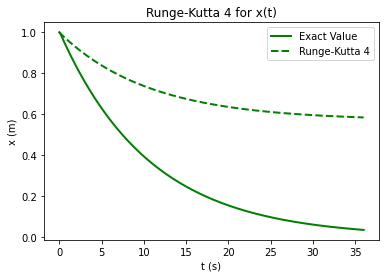

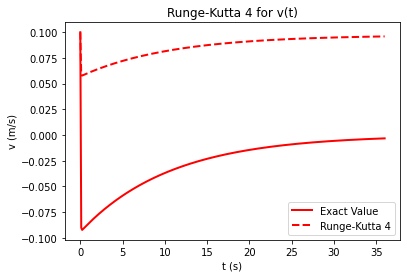

In [5]:
"""Runge Kutta 4th Project"""

""" 2. OVERDAMPING"""

from math import *
import numpy as np
import matplotlib.pyplot as plt

#Variables
k = 7
gamma = 1
m = 2
k_1 = 1. / 4           #making up value of k_1
k_2 = 2. / 4           #making up value of k_2
k_3 = 2. / 4           #making up value of k_3
k_4 = 1. / 4           #making up value of k_4
a_2 = 1. / 2           #making up value of a_2
a_3 = 1. / 2           #making up value of a_3
a_4 = 1.               #making up value of a_4
b_21 = 1. / 2          #making up value of b_21
b_31 = 0.              #making up value of b_31
b_32 = 1. / 2          #making up value of b_32
b_41 = 0.              #making up value of b_41
b_42 = 0.              #making up value of b_42
b_43 = 1.              #making up value of b_43
fxy_v = lambda t, x, v: -(lambda_I / (lambda_I - lambda_II) * exp(lambda_I * t)) + (-lambda_II / (lambda_II - lambda_I) * exp(lambda_II * t))   #fucntion of v
fxy_x = lambda t, x, v: -1 / (lambda_I - lambda_II) * exp(lambda_I * t) + 1 / (lambda_II - lambda_I) * exp(lambda_II * t)                       #function of x
t_i = 0.0            #t initial
t_f = 36.0           #t final
n = 325
dt = (t_f - t_i) / (n - 1)
x_range = np.linspace(t_i, t_f, n)
t = np.zeros(n)
x = np.zeros(n)
v = np.zeros(n) 
t[0] = t_i
x[0] = 1.0
v[0] = 0.1
omega_1 = sqrt(k / m)                       #calculating omega
print("Omega_1 = ", omega_1)
zeta_1 = gamma / (2 * m * omega_1)         #calculating zeta
print("zeta_1 = ", zeta_1)
omega_2 = omega_1 * sqrt(1 - zeta_1 ** 2)  #calculating omega_d
print("omega_2 = ", omega_2)
zeta_od = 10
lambda_I = -omega_1 * (zeta_od - sqrt(zeta_od ** 2 - 1))
lambda_II = -omega_1 * (zeta_od + sqrt(zeta_od ** 2 - 1))
A = x[0]
B = v[0]
CI_overdam = (B - A * lambda_II) / (lambda_I - lambda_II)
CII_overdam = (A * lambda_I - B) / (lambda_I - lambda_II)

#This is how Runge Kutta works
def rk4_x_t (t_i, xi, vi, dt):   #function of x
    RK1 = fxy_x(t_i, xi, vi)
    RK2 = fxy_x(t_i + a_2 * dt, xi + b_21 * RK1 * dt, vi)
    RK3 = fxy_x(t_i + a_3 * dt, xi + b_31 * RK1 * dt + b_32 * RK2 * dt, vi)
    RK4 = fxy_x(t_i + a_4 * dt, xi + b_41 * RK1 * dt + b_42 * RK2 * dt + b_43 * RK3 * dt, vi)
    x_1 = xi + (k_1 * RK1 + k_2 * RK2 + k_3 * RK3 + k_4 * RK4) * dt
    return x_1


def rk4_v_t (t_i, xi, vi, dt):   #function of v
    RK1 = fxy_v(t_i, xi, vi)
    RK2 = fxy_v(t_i + a_2 * dt, xi, vi + b_21 * RK1 * dt)
    RK3 = fxy_v(t_i + a_3 * dt, xi, vi + b_31 * RK1 * dt + b_32 * RK2 * dt)
    RK4 = fxy_v(t_i + a_4 * dt, xi, vi + b_41 * RK1 * dt + b_42 * RK2 * dt + b_43 * RK3 * dt)
    v_1 = vi + (k_1 * RK1 + k_2 * RK2 + k_3 * RK3 + k_4 * RK4) * dt
    return v_1

#Function of x(t) and v(t)
def x_t (CI, CII, lI, lII, t):
    return CI * exp(lI * t) + CII * exp(lII * t)


def v_t (CI, CII, lI, lII, t):
    return CI * lI * exp(lI * t) + CII * lII * exp(lII * t)


#Operations
for i in range(1, n):
    t[i] = t_i + i * dt
    x[i] = rk4_x_t(t[i - 1], x[i - 1], v[i - 1], dt)
    v[i] = rk4_v_t(t[i - 1], x[i - 1], v[i - 1], dt)
x_overdam = [x_t(CI_overdam, CII_overdam, lambda_I, lambda_II, tval) for tval in x_range]
v_overdam = [v_t(CI_overdam, CII_overdam, lambda_I, lambda_II, tval) for tval in x_range]

# Plotting Graphs of x(t)
plt.plot(x_range, x_overdam, label = "Exact Value", color = "g", linewidth = "2.0")
plt.plot(t, x, label = "Runge-Kutta 4", color = "g", linestyle = "--", linewidth = "2.0")
plt.title("Runge-Kutta 4 for x(t)")
plt.xlabel("t (s)")
plt.ylabel("x (m)")
plt.legend()
plt.show()
#Plotting graph for v(t)
plt.plot(x_range, v_overdam, label = "Exact Value", color = "r", linewidth = "2.0")
plt.plot(t, v, label = "Runge-Kutta 4", color = "r", linestyle = "--", linewidth = "2.0")
plt.title("Runge-Kutta 4 for v(t)")
plt.xlabel("t (s)")
plt.ylabel("v (m/s)")
plt.legend()
plt.show()

Omega_1 =  1.8708286933869707
zeta_1 =  0.1336306209562122
omega_2 =  1.8540496217739157


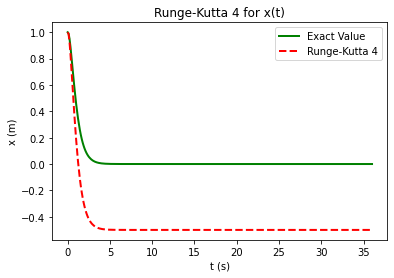

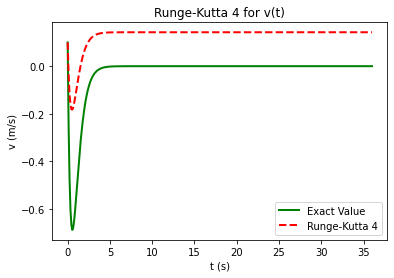

In [4]:
"""Runge Kutta 4th Project"""

""" 3. CRITICALLY DAMPED"""

from math import *
import numpy as np
import matplotlib.pyplot as plt

#Variables
k = 7.
gamma = 1
m = 2
k_1 = 1. / 4           #making up value of k_1
k_2 = 2. / 4           #making up value of k_2
k_3 = 2. / 4           #making up value of k_3
k_4 = 1. / 4           #making up value of k_4
a_2 = 1. / 2           #making up value of a_2
a_3 = 1. / 2           #making up value of a_3
a_4 = 1.               #making up value of a_4
b_21 = 1. / 2          #making up value of b_21
b_31 = 0.              #making up value of b_31
b_32 = 1. / 2          #making up value of b_32
b_41 = 0.              #making up value of b_41
b_42 = 0.              #making up value of b_42
b_43 = 1.              #making up value of b_43
fxy_v = lambda t, x, v: -CI_criticaldam * exp(-omega_1 * t) + CII_criticaldam * t * exp(-omega_1 * t)          #function of v
fxy_x = lambda t, x, v: exp(-omega_1 * t) * (-omega_1 * CI_criticaldam + CII_criticaldam * (1 - omega_1 * t))  #function of x
t_i = 0.0            #t initial
t_f = 36.0           #t final
n = 325
dt = (t_f - t_i) / (n - 1)
x_range = np.linspace(t_i, t_f, n)
t = np.zeros(n)
x = np.zeros(n)
v = np.zeros(n) 
t[0] = t_i
x[0] = 1.0
v[0] = 0.1
omega_1 = sqrt(k / m)                         #calculating omega
print("Omega_1 = ", omega_1)
zeta_1 = gamma / (2 * m * omega_1)            #calculating zeta
print("zeta_1 = ", zeta_1)
omega_2 = omega_1 * sqrt(1 - zeta_1 ** 2)     #calculating omega_d
print("omega_2 = ", omega_2)
zeta_od = 10
lambda_I = -omega_1 * (zeta_od - sqrt(zeta_od ** 2 - 1))
lambda_II = -omega_1 * (zeta_od + sqrt(zeta_od ** 2 - 1))
A = x[0]
B = v[0]
CI_criticaldam = A
CII_criticaldam = B + omega_1 * A

#This is how Runge Kutta works
def rk4_x_t (t_i, xi, vi, dt):   #function of x
    RK1 = fxy_x(t_i, xi, vi)
    RK2 = fxy_x(t_i + a_2 * dt, xi + b_21 * RK1 * dt, vi)
    RK3 = fxy_x(t_i + a_3 * dt, xi + b_31 * RK1 * dt + b_32 * RK2 * dt, vi)
    RK4 = fxy_x(t_i + a_4 * dt, xi + b_41 * RK1 * dt + b_42 * RK2 * dt + b_43 * RK3 * dt, vi)
    x_1 = xi + (k_1 * RK1 + k_2 * RK2 + k_3 * RK3 + k_4 * RK4) * dt
    return x_1


def rk4_v_t (t_i, xi, vi, dt):   #function of v
    RK1 = fxy_v(t_i, xi, vi)
    RK2 = fxy_v(t_i + a_2 * dt, xi, vi + b_21 * RK1 * dt)
    RK3 = fxy_v(t_i + a_3 * dt, xi, vi + b_31 * RK1 * dt + b_32 * RK2 * dt)
    RK4 = fxy_v(t_i + a_4 * dt, xi, vi + b_41 * RK1 * dt + b_42 * RK2 * dt + b_43 * RK3 * dt)
    v_1 = vi + (k_1 * RK1 + k_2 * RK2 + k_3 * RK3 + k_4 * RK4) * dt
    return v_1


#Function of x(t) and v(t)
def x_t (CI, CII, omega_1, t):
    return CI * exp(-omega_1 * t) + CII * t * exp(-omega_1 * t)


def v_t (CI, CII, omega_1, t):
    return exp(-omega_1 * t) * (-omega_1 * CI + CII * (1 - omega_1 * t))


#Operations
for i in range(1, n):
    t[i] = t_i + i * dt
    x[i] = rk4_x_t(t[i - 1], x[i - 1], v[i - 1], dt)
    v[i] = rk4_v_t(t[i - 1], x[i - 1], v[i - 1], dt)
x_criticaldam = [x_t(CI_criticaldam, CII_criticaldam, omega_1, tval) for tval in x_range]
v_criticaldam = [v_t(CI_criticaldam, CII_criticaldam, omega_1, tval) for tval in x_range]

#Plotting Graphs of x(t)
plt.plot(x_range, x_criticaldam, label = "Exact Value", color = "g", linewidth = "2.0")
plt.plot(t, x, label = "Runge-Kutta 4", color = "r", linestyle = "--", linewidth = "2.0")
plt.title("Runge-Kutta 4 for x(t)")
plt.xlabel("t (s)")
plt.ylabel("x (m)")
plt.legend()
plt.show()
#Plotting Graph for v(t)
plt.plot(x_range, v_criticaldam, label = "Exact Value", color = "g", linewidth = "2.0")
plt.plot(t, v, label = "Runge-Kutta 4", color = "r", linestyle = "--", linewidth = "2.0")
plt.title("Runge-Kutta 4 for v(t)")
plt.xlabel("t (s)")
plt.ylabel("v (m/s)")
plt.legend()
plt.show()

Omega_1 =  1.8708286933869707
zeta_1 =  0.1336306209562122
omega_2 =  1.8540496217739157


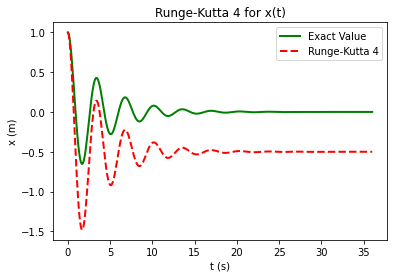

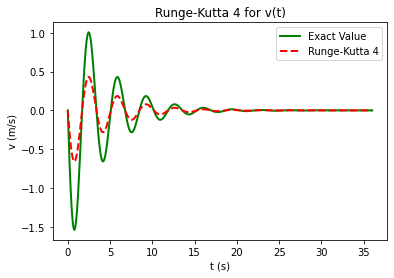

In [2]:
"""Runge Kutta 4th Project"""

""" 4. UNDERDAMPING"""

from math import *
import numpy as np
import matplotlib.pyplot as plt

#Variables
k = 7.
gamma = 1
m = 2
k_1 = 1. / 4           #making up value of k_1
k_2 = 2. / 4           #making up value of k_2
k_3 = 2. / 4           #making up value of k_3
k_4 = 1. / 4           #making up value of k_4
a_2 = 1. / 2           #making up value of a_2
a_3 = 1. / 2           #making up value of a_3
a_4 = 1.               #making up value of a_4
b_21 = 1. / 2          #making up value of b_21
b_31 = 0.              #making up value of b_31
b_32 = 1. / 2          #making up value of b_32
b_41 = 0.              #making up value of b_41
b_42 = 0.              #making up value of b_42
b_43 = 1.              #making up value of b_43
fxy_v = lambda t, x, v: exp(-zeta_1 * omega_1 * t) * (-DI * cos(omega_2 * t) + DII * sin(omega_2 * t))                              #function of v
fxy_x = lambda t, x, v: exp(-zeta_1 * omega_1 * t) * (-DI * (omega_2 * sin(omega_2 * t) + zeta_1 * omega_1 * cos(omega_2 * t)) +    #function of x
                                                       DII * (omega_2 * cos(omega_2 * t) - zeta_1 * omega_1 * sin(omega_2 * t)))
t_i = 0.0           #t initial
t_f = 36.0          #t final
n = 325
dt = (t_f - t_i) / (n - 1)
x_range = np.linspace(t_i, t_f, n)
t = np.zeros(n)
x = np.zeros(n)
v = np.zeros(n) 
t[0] = t_i
x[0] = 1.0
v[0] = 0.0
omega_1 = sqrt(k / m)                       #calculating omega
print("Omega_1 = ", omega_1)
zeta_1 = gamma / (2 * m * omega_1)         #calculating zeta
print("zeta_1 = ", zeta_1)
omega_2 = omega_1 * sqrt(1 - zeta_1 ** 2)  #calculating omega_d
print("omega_2 = ", omega_2)
zeta_od = 10
lambda_I = -omega_1 * (zeta_od - sqrt(zeta_od ** 2 - 1))
lambda_II = -omega_1 * (zeta_od + sqrt(zeta_od ** 2 - 1))
A = x[0]
B = v[0]
DI = A
DII = (B + A * zeta_1 * omega_1) / omega_2

#This is how Runge Kutta works
def rk4_x_t (t_i, xi, vi, dt):   #function of x
    RK1 = fxy_x(t_i, xi, vi)
    RK2 = fxy_x(t_i + a_2 * dt, xi + b_21 * RK1 * dt, vi)
    RK3 = fxy_x(t_i + a_3 * dt, xi + b_31 * RK1 * dt + b_32 * RK2 * dt, vi)
    RK4 = fxy_x(t_i + a_4 * dt, xi + b_41 * RK1 * dt + b_42 * RK2 * dt + b_43 * RK3 * dt, vi)
    x_1 = xi + (k_1 * RK1 + k_2 * RK2 + k_3 * RK3 + k_4 * RK4) * dt
    return x_1


def rk4_v_t (t_i, xi, vi, dt):   #function of v
    RK1 = fxy_v(t_i, xi, vi)
    RK2 = fxy_v(t_i + a_2 * dt, xi, vi + b_21 * RK1 * dt)
    RK3 = fxy_v(t_i + a_3 * dt, xi, vi + b_31 * RK1 * dt + b_32 * RK2 * dt)
    RK4 = fxy_v(t_i + a_4 * dt, xi, vi + b_41 * RK1 * dt + b_42 * RK2 * dt + b_43 * RK3 * dt)
    v_1 = vi + (k_1 * RK1 + k_2 * RK2 + k_3 * RK3 + k_4 * RK4) * dt
    return v_1

#Function of x(t) and v(t)
def x_t (DI, DII, zeta, omega_1, omega_2, t):
    return exp(-zeta * omega_1 * t) * (DI * cos(omega_2 * t) + DII * sin(omega_2 * t))


def v_t (DI, DII, zeta, omega_1, omega_2, t):
    return exp(-zeta * omega_1 * t) * (-DI * (omega_2 * sin(omega_2 * t) + zeta * omega_1 * cos(omega_2 * t)) + DII * (
            omega_2 * cos(omega_2 * t) - zeta * omega_1 * sin(omega_2 * t)))


#Operations
for i in range(1, n):
    t[i] = t_i + i * dt
    x[i] = rk4_x_t(t[i - 1], x[i - 1], v[i - 1], dt)
    v[i] = rk4_v_t(t[i - 1], x[i - 1], v[i - 1], dt)
x_underdam = [x_t(DI, DII, zeta_1, omega_1, omega_2, tval) for tval in x_range]
v_underdam = [v_t(DI, DII, zeta_1, omega_1, omega_2, tval) for tval in x_range]

#Plotting Graphs of x(t)
plt.plot(x_range, x_underdam, label = "Exact Value", color = "g", linewidth = "2.0")
plt.plot(t, x, label = "Runge-Kutta 4", color = "r", linestyle = "--", linewidth = "2.0")
plt.title("Runge-Kutta 4 for x(t)")
plt.xlabel("t (s)")
plt.ylabel("x (m)")
plt.legend()
plt.show()

#Plotting Graph for v(t)
plt.plot(x_range, v_underdam, label = "Exact Value", color = "g", linewidth = "2.0")
plt.plot(t, v, label = "Runge-Kutta 4", color = "r", linestyle = "--", linewidth = "2.0")
plt.title("Runge-Kutta 4 for v(t)")
plt.xlabel("t (s)")
plt.ylabel("v (m/s)")
plt.legend()
plt.show()

Omega_1 =  5.916079783099616
zeta_1 =  0.059160797830996155
omega_2 =  5.905717568594015


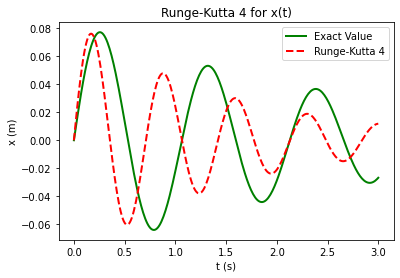

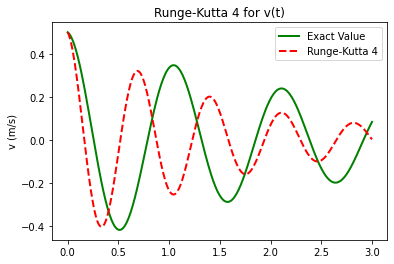

In [8]:
"""Runge Kutta 4th Project"""

""" 5. ASSUMING F(t)/m = 0"""

from math import *
import numpy as np
import matplotlib.pyplot as plt

#Variables
k = 35
gamma = 0.7
m = 1.0
k_1 = 1. / 4           #making up value of k_1
k_2 = 2. / 4           #making up value of k_2
k_3 = 2. / 4           #making up value of k_3
k_4 = 1. / 4           #making up value of k_4
a_2 = 1. / 2           #making up value of a_2
a_3 = 1. / 2           #making up value of a_3
a_4 = 1.               #making up value of a_4
b_21 = 1. / 2          #making up value of b_21
b_31 = 0.              #making up value of b_31
b_32 = 1. / 2          #making up value of b_32
b_41 = 0.              #making up value of b_41
b_42 = 0.              #making up value of b_42
b_43 = 1.              #making up value of b_43
f_over_m = lambda t: 0
fxy_x = lambda t, x, v: v                                    #function of x
fxy_v = lambda t, x, v: f_over_m(t) - 2 * gamma * v - k * x  #function of v
t_i = 0.0        #t initial
t_f = 3.0        #t final
n = 300
dt = (t_f - t_i) / (n - 1)
x_range = np.linspace(t_i, t_f,n)
t = np.zeros(n)
x = np.zeros(n)
v = np.zeros(n)
t[0] = t_i
x[0] = 0.0
v[0] = 0.5
omega_1 = sqrt(k / m)                       #calculating omega
print("Omega_1 = ", omega_1)
zeta_1 = gamma / (2 * m * omega_1)         #calculating zeta
print("zeta_1 = ", zeta_1)
omega_2 = omega_1 * sqrt(1 - zeta_1 ** 2)  #calculating omega_d
print("omega_2 = ", omega_2)
A = x[0]
B = v[0]
DI = A
DII = (B + A * zeta_1 * omega_1) / omega_2

#This is how Runge Kutta works
def rk4_x_t (t_i, xi, vi, dt):   #function of x
    RK1 = fxy_x(t_i, xi, vi)
    RK2 = fxy_x(t_i + a_2 * dt, xi + b_21 * RK1 * dt, vi)
    RK3 = fxy_x(t_i + a_3 * dt, xi + b_31 * RK1 * dt + b_32 * RK2 * dt, vi)
    RK4 = fxy_x(t_i + a_4 * dt, xi + b_41 * RK1 * dt + b_42 * RK2 * dt + b_43 * RK3 * dt, vi)
    x_1 = xi + (k_1 * RK1 + k_2 * RK2 + k_3 * RK3 + k_4 * RK4) * dt
    return x_1


def rk4_v_t (t_i, xi, vi, dt):   #function of v
    RK1 = fxy_v(t_i, xi, vi)
    RK2 = fxy_v(t_i + a_2 * dt, xi, vi + b_21 * RK1 * dt)
    RK3 = fxy_v(t_i + a_3 * dt, xi, vi + b_31 * RK1 * dt + b_32 * RK2 * dt)
    RK4 = fxy_v(t_i + a_4 * dt, xi, vi + b_41 * RK1 * dt + b_42 * RK2 * dt + b_43 * RK3 * dt)
    v_1 = vi + (k_1 * RK1 + k_2 * RK2 + k_3 * RK3 + k_4 * RK4) * dt
    return v_1

#Function of x(t) and v(t)
def x_t (DI, DII, zeta, omega_1, omega_2, t):
    return exp(-zeta * omega_1 * t) * (DI * cos(omega_2 * t) + DII * sin(omega_2 * t))


def v_t (DI, DII, zeta, omega_1, omega_2, t):
    return exp(-zeta * omega_1 * t) * (-DI * (omega_2 * sin(omega_2 * t) + zeta * omega_1 * cos(omega_2 * t)) + DII * (
            omega_2 * cos(omega_2 * t) - zeta * omega_1 * sin(omega_2 * t)))


#Operations
for i in range(1, n):
    t[i] = t_i + i * dt
    x[i] = rk4_x_t(t[i - 1], x[i - 1], v[i - 1], dt)
    v[i] = rk4_v_t(t[i - 1], x[i - 1], v[i - 1], dt)
x_f = [x_t(DI, DII, zeta_1, omega_1, omega_2, tval) for tval in x_range]
v_f = [v_t(DI, DII, zeta_1, omega_1, omega_2, tval) for tval in x_range]

#Plotting Graphs of x(t) and v(t)
plt.plot(x_range, x_f, label = "Exact Value", color = "g", linewidth = "2.0")
plt.plot(t, x, label = "Runge-Kutta 4", color = "r", linestyle = "--", linewidth = "2.0")
plt.title("Runge-Kutta 4 for x(t)")
plt.xlabel("t (s)")
plt.ylabel("x (m)")
plt.legend()
plt.show()
plt.plot(x_range, v_f, label = "Exact Value", color = "g", linewidth = "2.0")
plt.plot(t, v, label = "Runge-Kutta 4", color = "r", linestyle = "--", linewidth = "2.0")
plt.title("Runge-Kutta 4 for v(t)")
plt.ylabel("v (m/s)")
plt.legend()
plt.show()

Omega_1 =  6.324555320336759
zeta_1 =  0.05533985905294663
omega_2 =  6.314863418950564


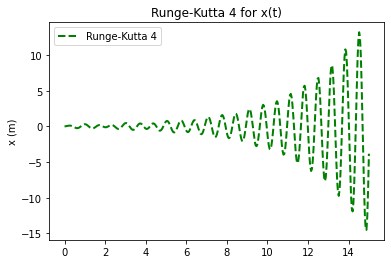

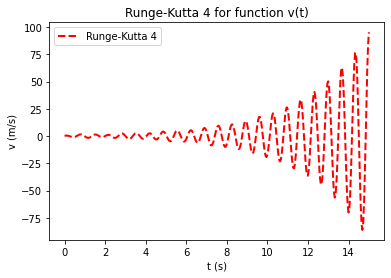

In [1]:
"""Runge Kutta 4th Project"""

"""6. ASSUMING F(t)/m = Acos(wt)"""

from math import *
import numpy as np
import matplotlib.pyplot as plt

#Variables
k = 40
gamma = .7
m = 1.0
A = 2.8
k_1 = 1. / 4           #making up value of k_1
k_2 = 2. / 4           #making up value of k_2
k_3 = 2. / 4           #making up value of k_3
k_4 = 1. / 4           #making up value of k_4
a_2 = 1. / 2           #making up value of a_2
a_3 = 1. / 2           #making up value of a_3
a_4 = 1.               #making up value of a_4
b_21 = 1. / 2          #making up value of b_21
b_31 = 0.              #making up value of b_31
b_32 = 1. / 2          #making up value of b_32
b_41 = 0.              #making up value of b_41
b_42 = 0.              #making up value of b_42
b_43 = 1.              #making up value of b_43
f_over_m = lambda t: A * cos(omega_1 * t)
fxy_x = lambda t, x, v: v
fxy_v = lambda t, x, v: f_over_m(t) - A * gamma * v - k * x
t_i = 0.0      #t initial
t_f = 15.0     #t final
n = 375
dt = (t_f - t_i) / (n - 1)
x_range = np.linspace(t_i, t_f,n)
t = np.zeros(n)
x = np.zeros(n)
v = np.zeros(n)
t[0] = t_i
x[0] = 0.0
v[0] = 0.2
omega_1 = sqrt(k / m)                       #calculating omega
print("Omega_1 = ", omega_1)
zeta_1 = gamma / (2 * m * omega_1)         #calculating zeta
print("zeta_1 = ", zeta_1)
omega_2 = omega_1 * sqrt(1 - zeta_1 ** 2)  #calculating omega_d
print("omega_2 = ", omega_2)

def rk4_x_t (t_i, xi, vi, dt):   #function of x
    RK1 = fxy_x(t_i, xi, vi)
    RK2 = fxy_x(t_i + a_2 * dt, xi + b_21 * RK1 * dt, vi)
    RK3 = fxy_x(t_i + a_3 * dt, xi + b_31 * RK1 * dt + b_32 * RK2 * dt, vi)
    RK4 = fxy_x(t_i + a_4 * dt, xi + b_41 * RK1 * dt + b_42 * RK2 * dt + b_43 * RK3 * dt, vi)
    x_1 = xi + (k_1 * RK1 + k_2 * RK2 + k_3 * RK3 + k_4 * RK4) * dt
    return x_1


def rk4_v_t (t_i, xi, vi, dt):   #function of v
    RK1 = fxy_v(t_i, xi, vi)
    RK2 = fxy_v(t_i + a_2 * dt, xi, vi + b_21 * RK1 * dt)
    RK3 = fxy_v(t_i + a_3 * dt, xi, vi + b_31 * RK1 * dt + b_32 * RK2 * dt)
    RK4 = fxy_v(t_i + a_4 * dt, xi, vi + b_41 * RK1 * dt + b_42 * RK2 * dt + b_43 * RK3 * dt)
    v_1 = vi + (k_1 * RK1 + k_2 * RK2 + k_3 * RK3 + k_4 * RK4) * dt
    return v_1

#Operations
for i in range(1, n):
    t[i] = t_i + i * dt
    x[i] = rk4_x_t(t[i - 1], x[i - 1], v[i - 1], dt)
    v[i] = rk4_v_t(t[i - 1], x[i - 1], v[i - 1], dt)

# Plotting Graphs for x(t)
plt.plot(t, x, label = "Runge-Kutta 4", color = "g", linestyle = "--", linewidth = "2.0")
plt.title("Runge-Kutta 4 for x(t)")
plt.ylabel("x (m)")
plt.legend()
plt.show()

#Plotting Graph for v(t)
plt.plot(t, v, label = "Runge-Kutta 4", color = "r", linestyle = "--", linewidth = "2.0")
plt.title("Runge-Kutta 4 for function v(t)")
plt.xlabel("t (s)")
plt.ylabel("v (m/s)")
plt.legend()
plt.show()
